In [1]:
library(compositions)
library(cowplot)
library(ggplot2)
library(reshape2)
library(plyr)
library(stringr)
library(lme4)
library(lmerTest)
library(gridExtra)

Loading required package: tensorA

Attaching package: ‘tensorA’

The following object is masked from ‘package:base’:

    norm

Loading required package: robustbase
Loading required package: energy
Loading required package: bayesm
Welcome to compositions, a package for compositional data analysis.
Find an intro with "? compositions"


Attaching package: ‘compositions’

The following objects are masked from ‘package:stats’:

    cor, cov, dist, var

The following objects are masked from ‘package:base’:

    %*%, scale, scale.default

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix

Attaching package: ‘lmerTest’

The following object is masked from ‘package:lme4’:

    lmer

The following object is masked from ‘package:robustbase’:

    carrots

The following object is masked from ‘package:stats’:

    step



In [69]:
cut_taxonomy_string <- function(x, n) {
    y<-str_split(str_trim(str_flatten(str_split_fixed(str_replace_all(x,"[kpcofgs]__", ""), ";", n=7))), " ")[[1]]
    if (n >= length(y)) {
        n = length(y)
    }
    if (n==7) {
        str_flatten(y[c(n-1, n)], collapse = " ")
    } else {
        y[n]
    }
}
len_wrapper <- function(x, ...) 
{
  paste(strwrap(x, ...), collapse = "\n")
}

In [2]:
asv_tab <- read.table("data/asv_table.tsv", sep="\t", comment.char="", skip=1, header=1, row.names=1)
md <- read.table("data/METADATA.txt", sep="\t", header=1, row.names=1)
rownames(md) <- gsub("-",".",rownames(md))
taxonomy <- read.table("data/taxonomy.tsv", sep="\t", header=1, row.names=1)

In [3]:
asv_tab.clr <- t(as.data.frame(clr(t(asv_tab))))
rownames(asv_tab.clr) <- rownames(asv_tab)
asv_tab.clr.m <- melt(asv_tab.clr)
colnames(asv_tab.clr.m) <- c("asv_id","sample_id","clr_rel_abund")
asv_tab.clr.m$full_taxonomy <- taxonomy[as.vector(asv_tab.clr.m$asv_id), 'Taxon']
asv_tab.clr.m$genus <- str_extract(asv_tab.clr.m$full_taxonomy
                                   ,".*; s__")
asv_tab.clr.m$family <- str_extract(asv_tab.clr.m$full_taxonomy
                                   ,".*; g__")
asv_tab.clr.m$phylum <- str_extract(asv_tab.clr.m$full_taxonomy
                                   ,".*; c__")

In [99]:
tax_level <- "asv_id" # asv_id for tree figures
asv_tab.clr.agg <- aggregate(asv_tab.clr.m$clr_rel_abund, 
                             by=list(asv_tab.clr.m$sample_id,
                                     asv_tab.clr.m[,tax_level]), 
                             FUN=sum)
colnames(asv_tab.clr.agg) <- c("sample_id",tax_level,"clr_rel_abund")
asv_tab.clr.agg$phase <- md[as.vector(asv_tab.clr.agg$sample_id),'phase']
asv_tab.clr.agg$time <- md[as.vector(asv_tab.clr.agg$sample_id),'timePoint']
asv_tab.clr.agg$type <- md[as.vector(asv_tab.clr.agg$sample_id),'sampleType']
asv_tab.clr.agg$subject <- md[as.vector(asv_tab.clr.agg$sample_id),'subject']
levels(asv_tab.clr.agg$time)[levels(asv_tab.clr.agg$time) == "B"] <- "-7"
asv_tab.clr.agg$time <- factor(asv_tab.clr.agg$time, levels=c("-7","0","7","14","21","28","35"))
head(asv_tab.clr.agg, 20)

sample_id,genus,clr_rel_abund,phase,time,type,subject
P11.Sal.0,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,0,Sal,P11
P11.Sal.14,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,14,Sal,P11
P11.Sal.21,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,21,Sal,P11
P11.Sal.28,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,restoration,28,Sal,P11
P11.Sal.35,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,restoration,35,Sal,P11
P11.Sal.7,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,7,Sal,P11
P11.Sal.B,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,pre-induction,-7,Sal,P11
P11.SubG.0,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,0,SubG,P11
P11.SubG.14,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,14,SubG,P11
P11.SubG.21,k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,0,induction,21,SubG,P11


In [100]:
options(repr.plot.width=2,repr.plot.height=2)
results <- data.frame(row.names = unique(asv_tab.clr.agg[,tax_level]))
results$SubG_GLM_p <- NA
results$SupG_GLM_p <- NA
results$Sal_GLM_p <- NA
results$T_GLM_p <- NA
head(results)
plot_list <- list()
i<-1
for (tax_str in unique(asv_tab.clr.agg[,tax_level])) {
    type_subset <- c()
    p_vals <- list()
    for (sample_type in c("SubG", "SupG", "Sal", "T")) {
        data_subset <- asv_tab.clr.agg[asv_tab.clr.agg[,tax_level]==tax_str,]
        data_subset <- subset(data_subset,phase=='induction')
        data_subset <- subset(data_subset,type==sample_type)
        data_subset$time <- as.numeric(as.character(data_subset$time))
        options(warn=-1)
        p.val <- tryCatch({
            fit1 <- lmer(clr_rel_abund~time+(1|subject), data=data_subset)
            p.val <- anova(fit1, type=1)['time',"Pr(>F)"]
            #if (as.numeric(p.val) < 0.05) {print(summary(anova(fit1)))}
            p.val}, 
            error = function(e) {p.val <- NA}, 
            finally = function(e) p.val,
            silent=TRUE)
        options(warn=0)
        if ((!is.na(p.val)) && (as.numeric(p.val) <= 0.05)) {
            type_subset <- c(type_subset, sample_type)
            p_vals[sample_type] <- p.val
        }
        results[tax_str, paste(sample_type, "_GLM_p", sep="")] <- p.val
    }
    if (length(type_subset) > 0) {
        plot_subset <- asv_tab.clr.agg[asv_tab.clr.agg[,tax_level]==tax_str,]
        plot_subset <- subset(plot_subset, type %in% type_subset)
        label <- ""
        for (sample_type in type_subset) {
            label<- paste(label, paste(sample_type, 
                                      round(as.numeric(p_vals[sample_type]),3),
                                      sep=": p = "),
                          sep="\n")
        }
        title <- tax_str
        p <- ggplot(plot_subset,
                 aes(x=time,y=clr_rel_abund,group=type,shape=type,col=phase)) +
                 scale_shape_manual(drop=FALSE, values=c(0,1,5,6)) +
                 stat_summary(fun.y=mean, geom="line", aes(group=interaction(1,type)))  + 
                 stat_summary(fun.y=mean, geom="point", size=4, alpha=0.7) +
                 stat_summary(fun.data = mean_se, geom = "errorbar", width=0.1) +
                 scale_colour_brewer(palette = "Dark2") +
                 ggtitle(len_wrapper(title, 15)) + xlab("") + ylab("") +
                 theme(legend.position="none", 
                       axis.title.y=element_text(size=10),
                       axis.title.x=element_text(size=10),
                       plot.title=element_text(size=10))
                 #annotate("text",label=gsub("^\n","",label),x=-Inf,y=Inf,hjust=-0.1, vjust=1.2, size=3)
        plot_list[[i]] <- p
        i <- i + 1
    }
}
results[,"SubG_GLM_p_adj"] <- p.adjust(results[,"SubG_GLM_p"], method = "fdr")
results[,"SupG_GLM_p_adj"] <- p.adjust(results[,"SupG_GLM_p"], method = "fdr")
results[,"Sal_GLM_p_adj"] <- p.adjust(results[,"Sal_GLM_p"], method = "fdr")
results[,"T_GLM_p_adj"] <- p.adjust(results[,"T_GLM_p"], method = "fdr")
na.omit(results[results[,"SubG_GLM_p_adj"]<=0.05,])
na.omit(results[results[,"SupG_GLM_p_adj"]<=0.05,])
na.omit(results[results[,"Sal_GLM_p_adj"]<=0.05,])
na.omit(results[results[,"T_GLM_p_adj"]<=0.05,])
i = 1
for (pl in plot_list) {
    label <- NULL
    for (site in c("SubG", "SupG", "Sal", "T")) {
        site2 <- switch(site, "SubG" = "Subgingival", "SupG" = "Supragingival", "Sal" = "Saliva", "T" = "Tongue")
        p.val <- results[gsub("\n"," ",pl$labels$title), paste(site, "_GLM_p_adj",sep="")]
        if ((!is.na(p.val)) && (p.val <= 0.05)) {
            if (is.null(label)) {
                label <- paste(site2, round(p.val,4), sep=": ")
            } else {
                label <- paste(label, paste(site2, round(p.val,4), sep=": "), sep="\n")
            }
        }
    }
    if (is.null(label)) {
        label <- ""
    }
    plot_list[[i]] <- pl + annotate("text",label=label,x=-Inf,y=Inf,hjust=-0.1, vjust=1.2, size=3)
    i<- i + 1
}

,SubG_GLM_p,SupG_GLM_p,Sal_GLM_p,T_GLM_p
k__Archaea; p__[Parvarchaeota]; c__[Parvarchaea]; o__YLA114; f__; g__; s__,NA,NA,NA,NA
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Cenarchaeales; f__Cenarchaeaceae; g__; s__,NA,NA,NA,NA
k__Archaea; p__Crenarchaeota; c__Thaumarchaeota; o__Cenarchaeales; f__Cenarchaeaceae; g__Nitrosopumilus; s__,NA,NA,NA,NA
k__Archaea; p__Euryarchaeota; c__Thermoplasmata; o__E2; f__Marine group II; g__; s__,NA,NA,NA,NA
k__Bacteria; p__; c__; o__; f__; g__; s__,NA,NA,NA,NA
k__Bacteria; p__[Thermi]; c__Deinococci; o__Deinococcales; f__Deinococcaceae; g__Deinococcus; s__,NA,NA,NA,NA


,SubG_GLM_p,SupG_GLM_p,Sal_GLM_p,T_GLM_p,SubG_GLM_p_adj,SupG_GLM_p_adj,Sal_GLM_p_adj,T_GLM_p_adj
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Actinomycetaceae; g__Actinomyces; s__,5.040256e-04,4.664803e-02,0.6832156974,0.86174889,0.0296135312,0.280060641,0.76791186,0.9255821
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Micrococcaceae; g__Rothia; s__,3.896248e-04,5.223465e-03,0.2725441162,0.14520423,0.0287348312,0.137302520,0.76552782,0.4556386
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Propionibacteriaceae; g__; s__,1.187456e-03,3.957632e-04,0.2427689462,0.29999368,0.0389221751,0.014564085,0.76552782,0.6214155
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Prevotellaceae; g__Prevotella; s__,9.624833e-04,9.752800e-02,0.3382440166,0.95541836,0.0365973113,0.280060641,0.76552782,0.9788992
k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Carnobacteriaceae; g__Granulicatella; s__,1.005906e-06,8.407686e-05,0.5352580529,0.08423810,0.0001483711,0.004456266,0.76552782,0.4556386
k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__,4.845051e-07,1.697313e-05,0.4939323234,0.02471433,0.0001429290,0.003123056,0.76552782,0.4556386
k__Bacteria; p__Firmicutes; c__Clostridia; o__Clostridiales; f__Veillonellaceae; g__Selenomonas; s__,9.924695e-04,3.813942e-01,0.3111589243,0.75240398,0.0365973113,0.508525553,0.76552782,0.8473676
k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Neisseriales; f__Neisseriaceae; g__Neisseria; s__,2.619430e-04,8.960924e-02,0.0006255989,0.58124353,0.0257577329,0.280060641,0.04254072,0.7696955
k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pasteurellales; f__Pasteurellaceae; g__Haemophilus; s__,6.023091e-04,5.996661e-05,0.3244196152,0.16434836,0.0296135312,0.004456266,0.76552782,0.4556386


,SubG_GLM_p,SupG_GLM_p,Sal_GLM_p,T_GLM_p,SubG_GLM_p_adj,SupG_GLM_p_adj,Sal_GLM_p_adj,T_GLM_p_adj
k__Bacteria; p__Actinobacteria; c__Actinobacteria; o__Actinomycetales; f__Propionibacteriaceae; g__; s__,1.187456e-03,3.957632e-04,0.2427689,0.29999368,0.0389221751,0.014564085,0.7655278,0.6214155
k__Bacteria; p__Bacteroidetes; c__Bacteroidia; o__Bacteroidales; f__Porphyromonadaceae; g__Porphyromonas; s__,7.742592e-03,9.687536e-05,0.1425210,0.44532011,0.1797235527,0.004456266,0.7655278,0.7696955
k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Carnobacteriaceae; g__Granulicatella; s__,1.005906e-06,8.407686e-05,0.5352581,0.08423810,0.0001483711,0.004456266,0.7655278,0.4556386
k__Bacteria; p__Firmicutes; c__Bacilli; o__Lactobacillales; f__Streptococcaceae; g__Streptococcus; s__,4.845051e-07,1.697313e-05,0.4939323,0.02471433,0.0001429290,0.003123056,0.7655278,0.4556386
k__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Pasteurellales; f__Pasteurellaceae; g__Haemophilus; s__,6.023091e-04,5.996661e-05,0.3244196,0.16434836,0.0296135312,0.004456266,0.7655278,0.4556386


,SubG_GLM_p,SupG_GLM_p,Sal_GLM_p,T_GLM_p,SubG_GLM_p_adj,SupG_GLM_p_adj,Sal_GLM_p_adj,T_GLM_p_adj
k__Bacteria; p__GN02; c__BD1-5; o__; f__; g__; s__,0.019117414,0.05671277,9.458182e-05,0.2330278,0.25061038,0.2800606,0.01286313,0.5460852
k__Bacteria; p__Proteobacteria; c__Betaproteobacteria; o__Neisseriales; f__Neisseriaceae; g__Neisseria; s__,0.000261943,0.08960924,6.255989e-04,0.5812435,0.02575773,0.2800606,0.04254072,0.7696955


SubG_GLM_p,SupG_GLM_p,Sal_GLM_p,T_GLM_p,SubG_GLM_p_adj,SupG_GLM_p_adj,Sal_GLM_p_adj,T_GLM_p_adj


In [247]:
options(repr.plot.width=10,repr.plot.height=20)
pdf("Full_Abundance_Sig.pdf", width=10, height=20)
for (i in c(39,38,37,36)) {
    plot_list[[i]] <- plot_list[[i]] + xlab("Time (days)")
}
for (i in c(1,5,9,13,17,21,25,29,33,37)) {
    plot_list[[i]] <- plot_list[[i]] + ylab("clr(abundance)")
}
p.legend <- get_legend(plot_list[[1]] + 
                       theme(legend.position="bottom") + 
                       guides(shape = guide_legend(ncol = 1, title.position="top", title="Site"), 
                              col = guide_legend(ncol = 1, title.position="top", title="Phase")))
plot_list[[40]] <- p.legend
grid.arrange(grobs=plot_list, ncol=4)
dev.off()

png 
  2

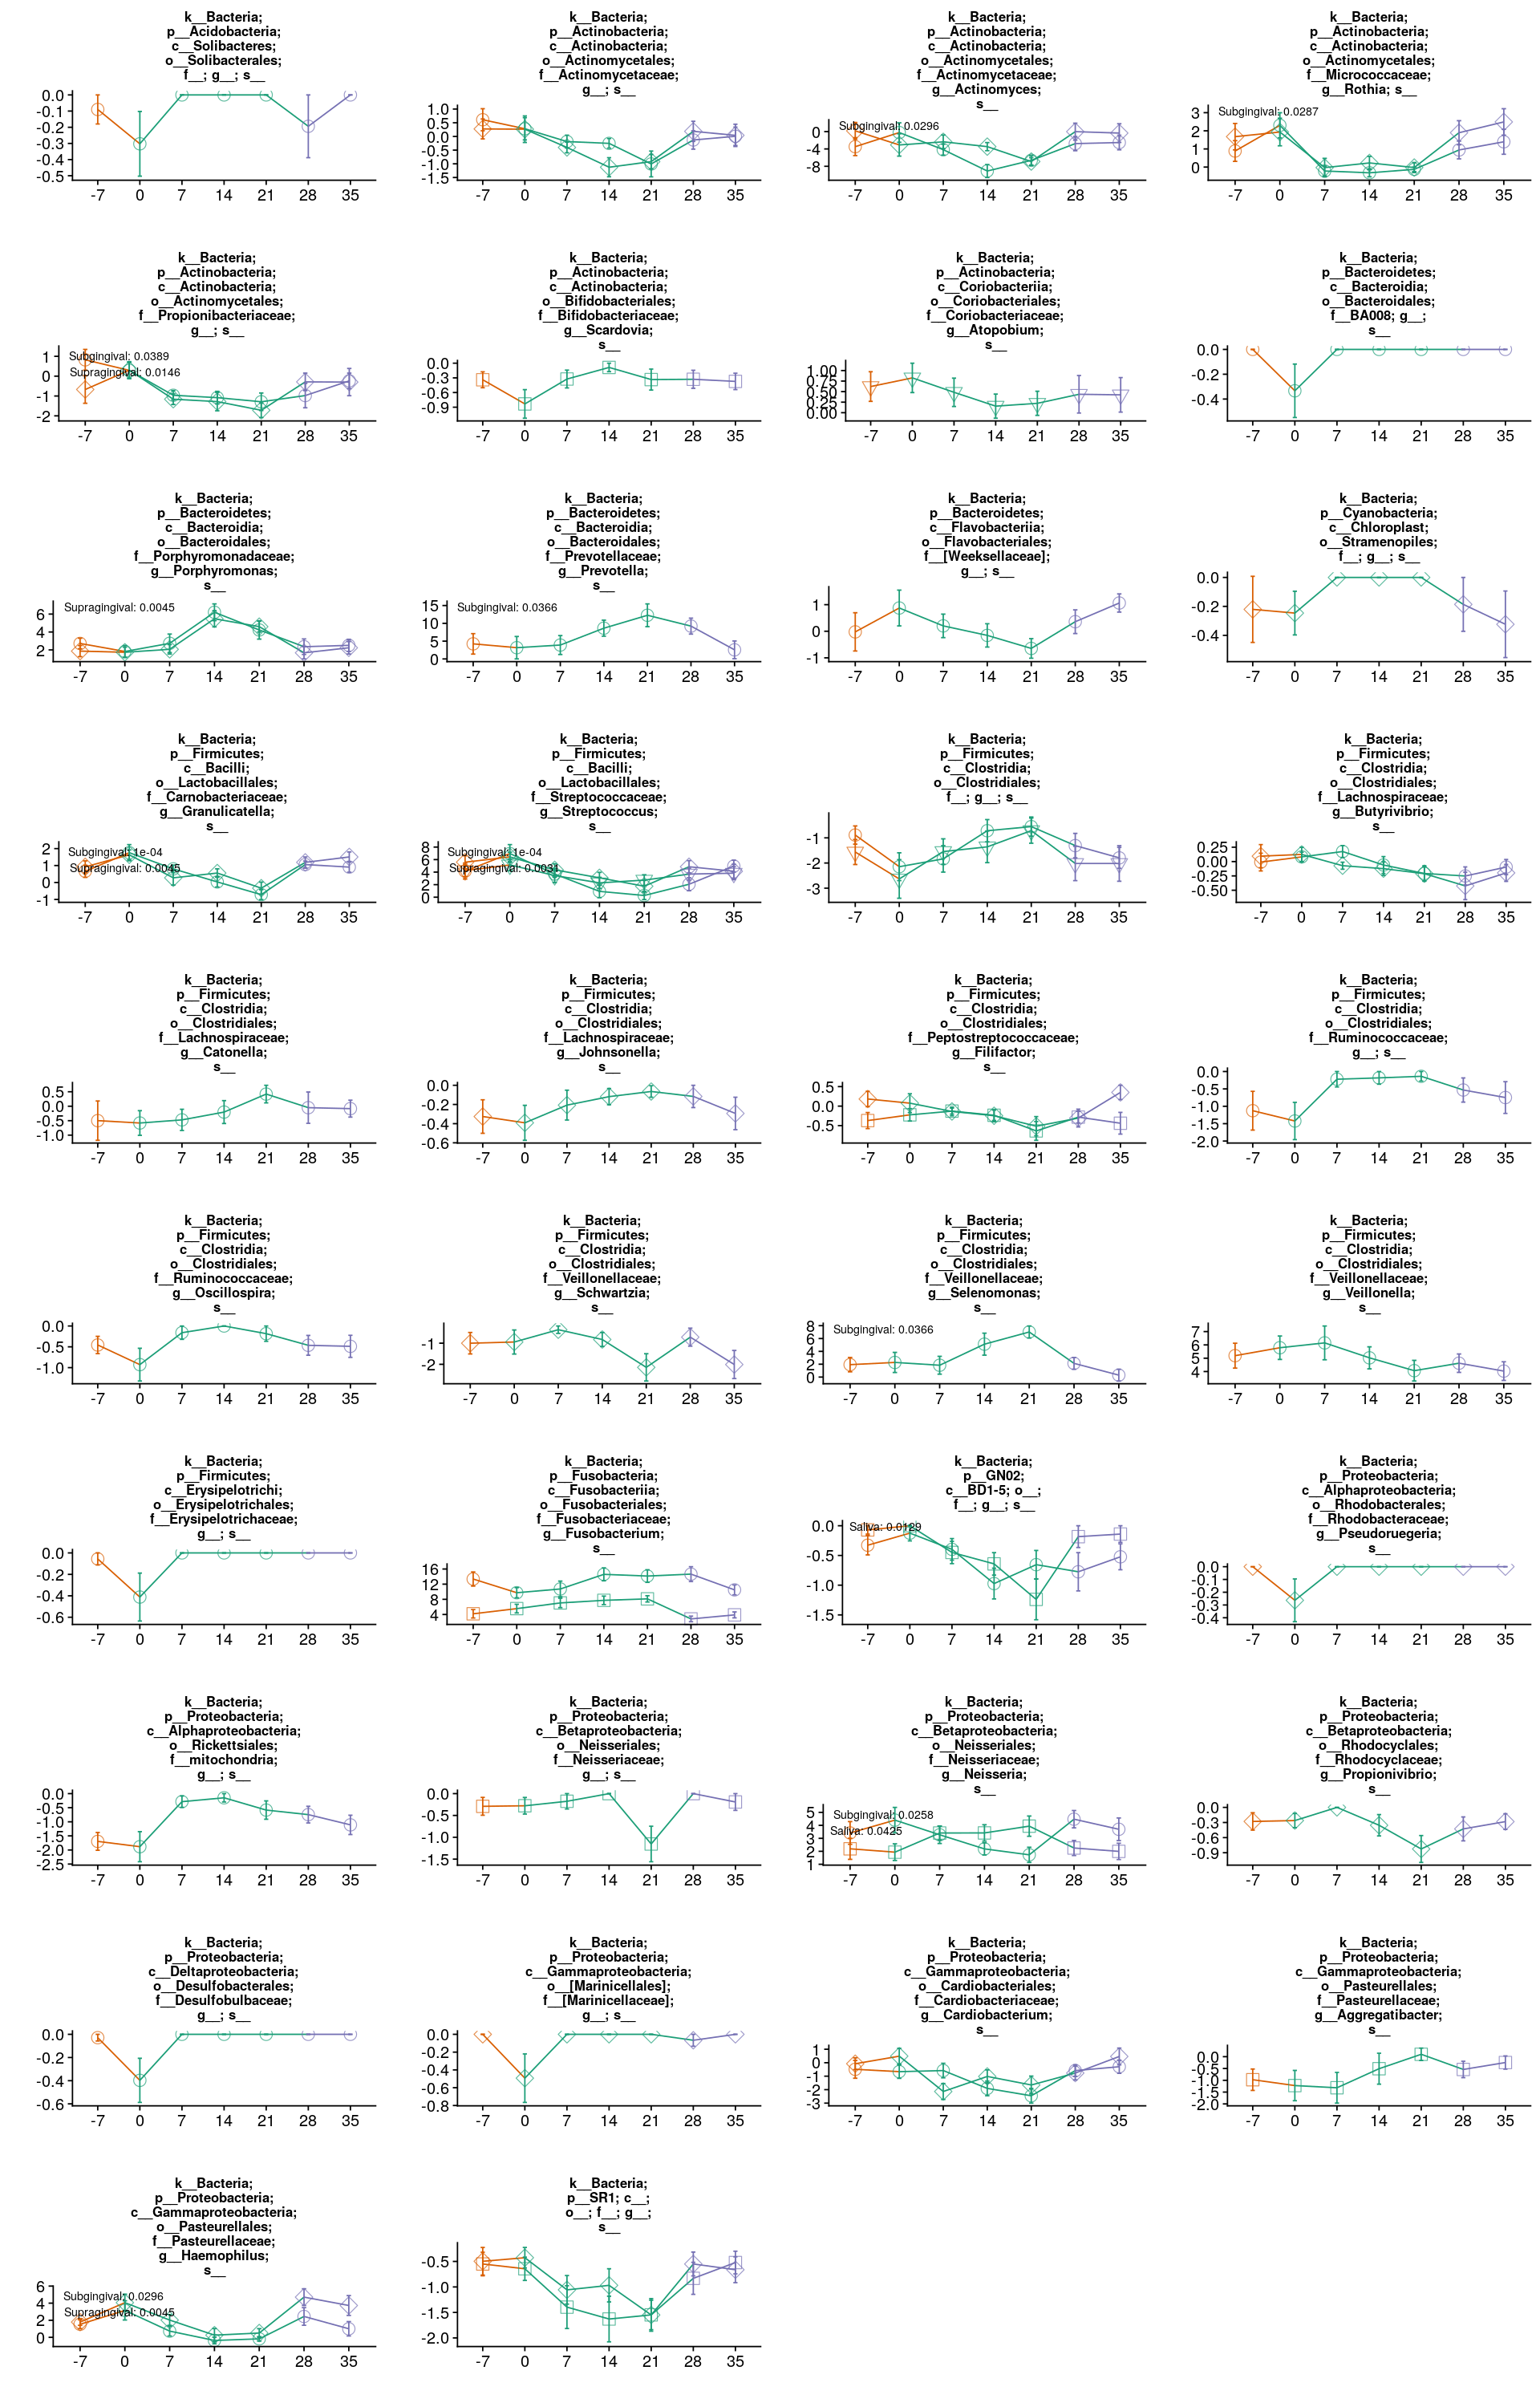

In [101]:
#Genus-level plotting
options(repr.plot.width=16,repr.plot.height=)
#pdf("Genus_Abundance_Sig.pdf", width=10, height=16)
#for (i in c(27,26,25,24)) {
#    plot_list[[i]] <- plot_list[[i]] + xlab("Time (days)")
#}
#for (i in c(1,5,9,13,17,21,25)) {
#    plot_list[[i]] <- plot_list[[i]] + ylab("clr(abundance)")
#}
#p.legend <- get_legend(plot_list[[1]] + 
#                       theme(legend.position="bottom") + 
#                       guides(shape = guide_legend(ncol = 1, title.position="top", title="Site"), 
#                              col = guide_legend(ncol = 1, title.position="top", title="Phase")))
#plot_list[[28]] <- p.legend
grid.arrange(grobs=plot_list, ncol=4)
#dev.off()

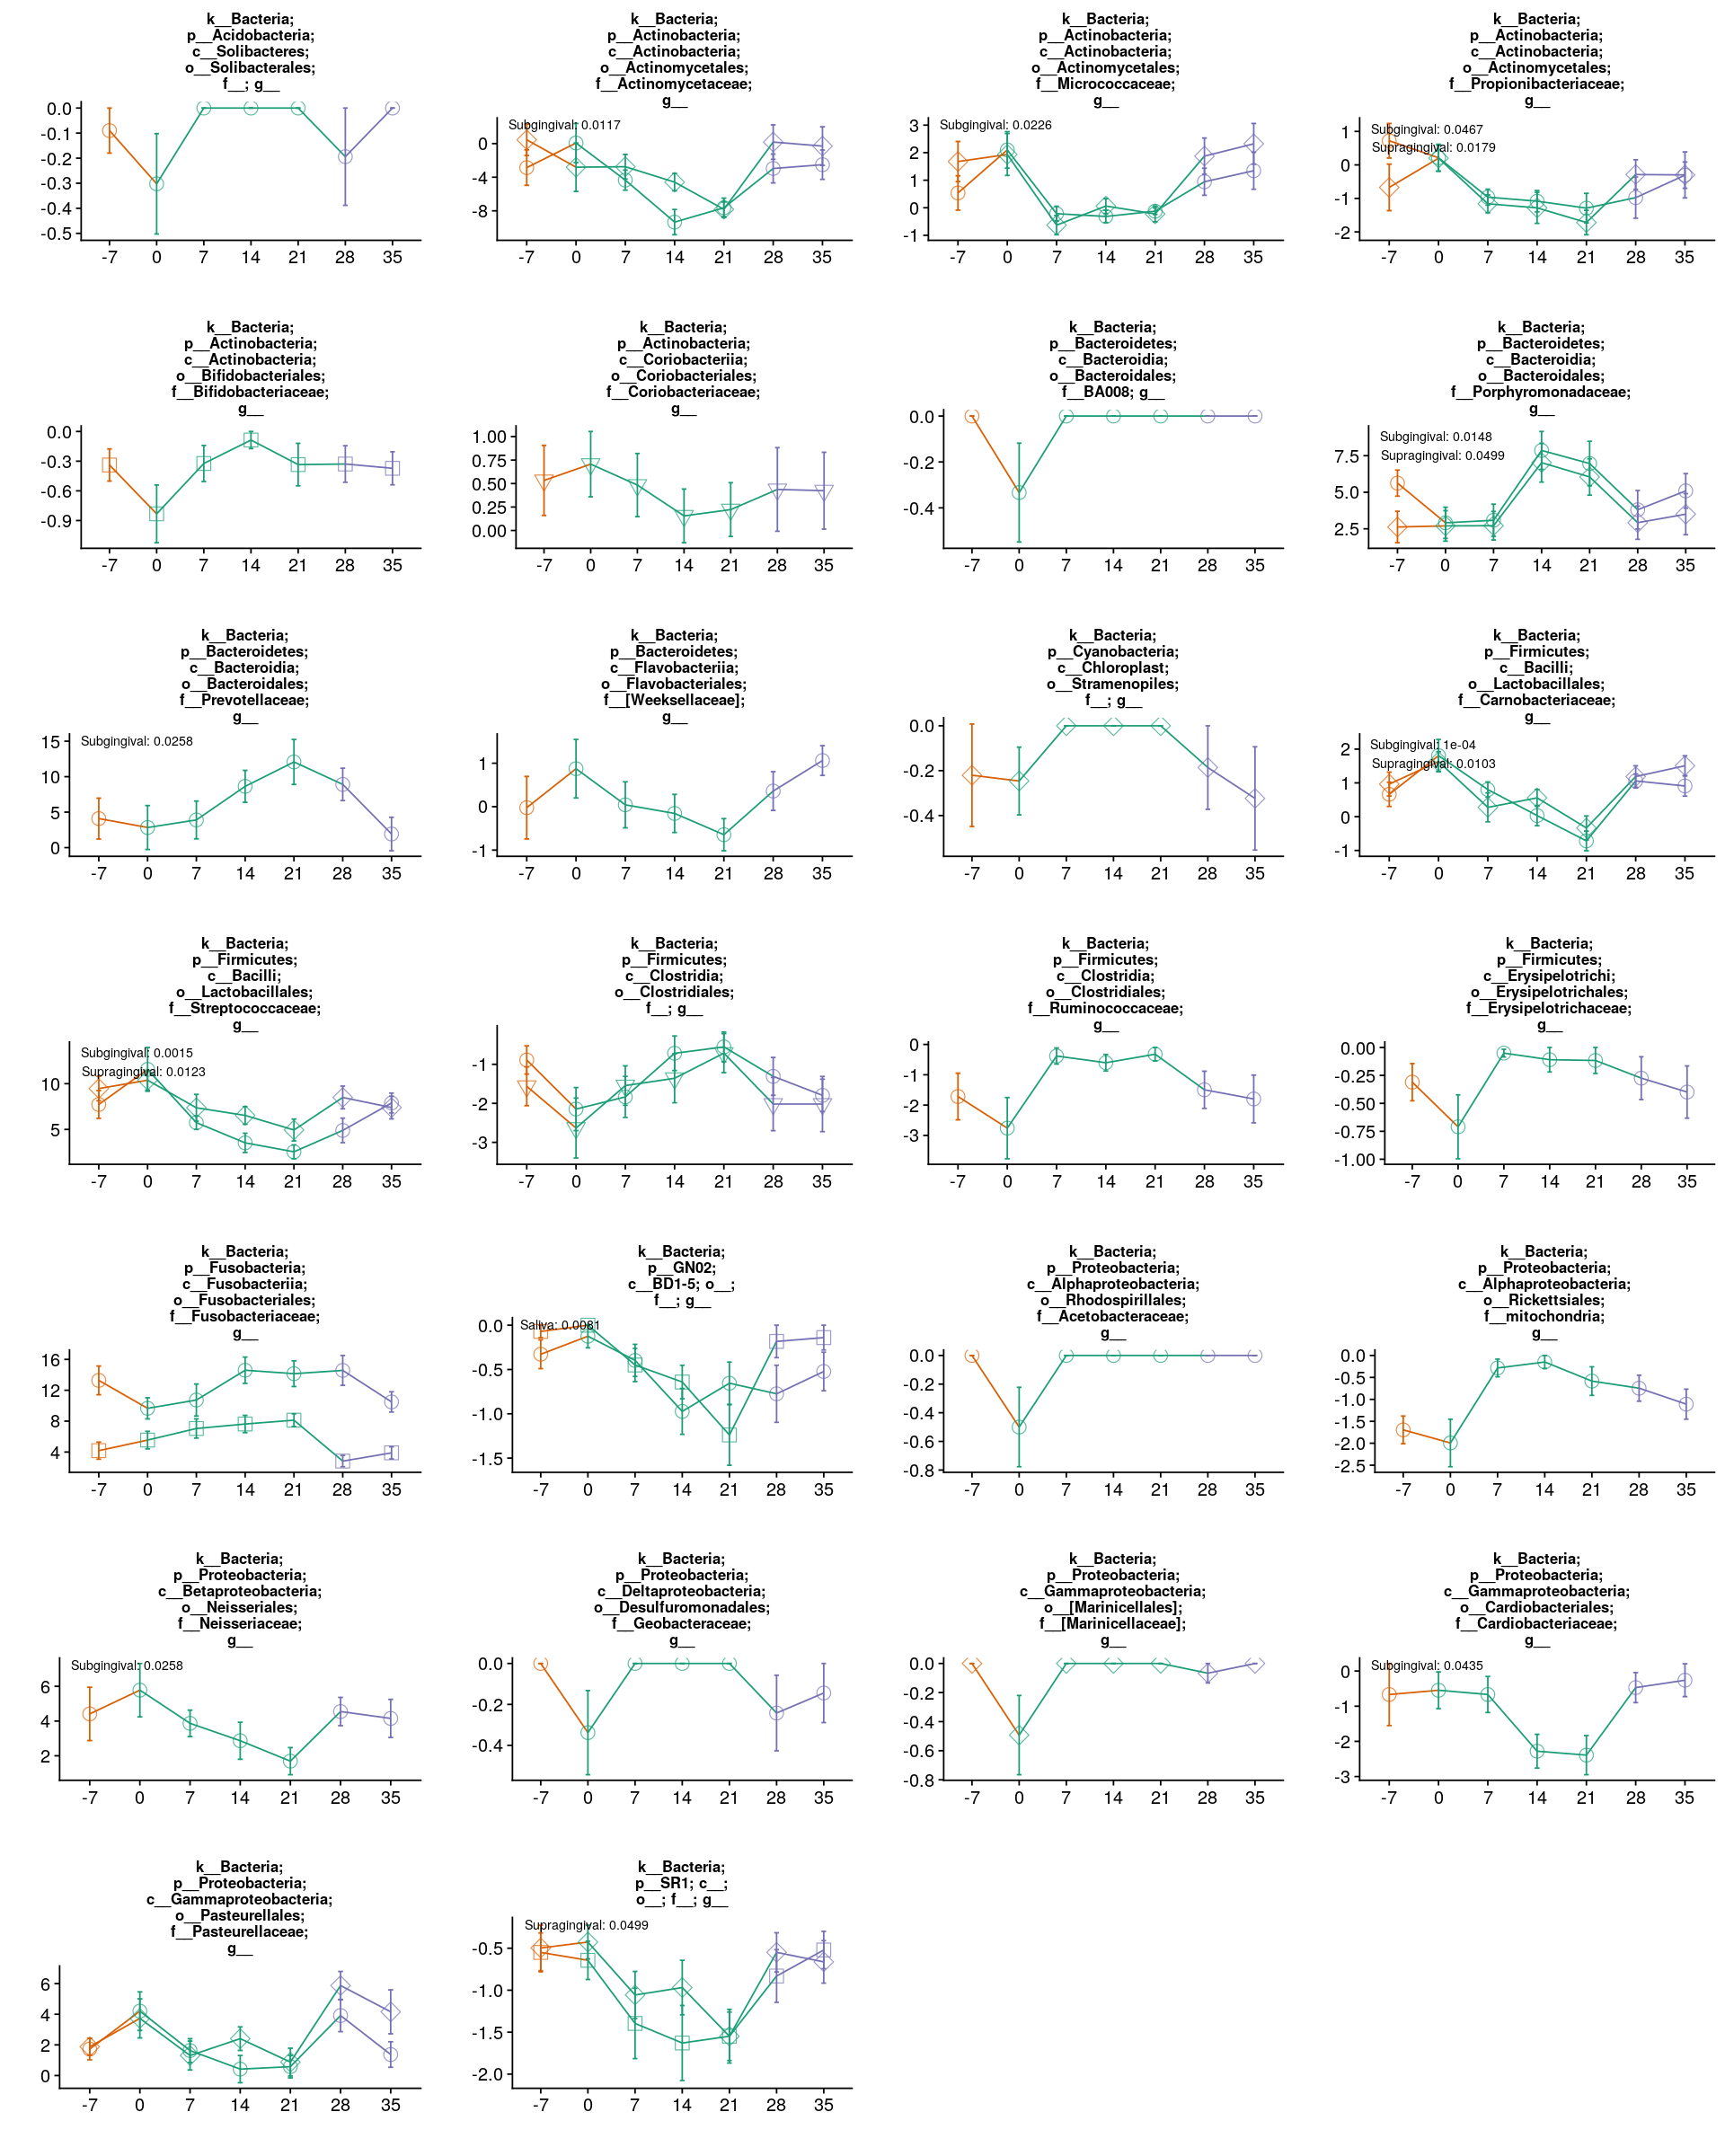

In [98]:
#Family-level plotting
options(repr.plot.width=16,repr.plot.height=20)
#pdf("Genus_Abundance_Sig.pdf", width=10, height=16)
#for (i in c(27,26,25,24)) {
#    plot_list[[i]] <- plot_list[[i]] + xlab("Time (days)")
#}
#for (i in c(1,5,9,13,17,21,25)) {
#    plot_list[[i]] <- plot_list[[i]] + ylab("clr(abundance)")
#}
#p.legend <- get_legend(plot_list[[1]] + 
#                       theme(legend.position="bottom") + 
#                       guides(shape = guide_legend(ncol = 1, title.position="top", title="Site"), 
#                              col = guide_legend(ncol = 1, title.position="top", title="Phase")))
#plot_list[[28]] <- p.legend
grid.arrange(grobs=plot_list, ncol=4)
#dev.off()

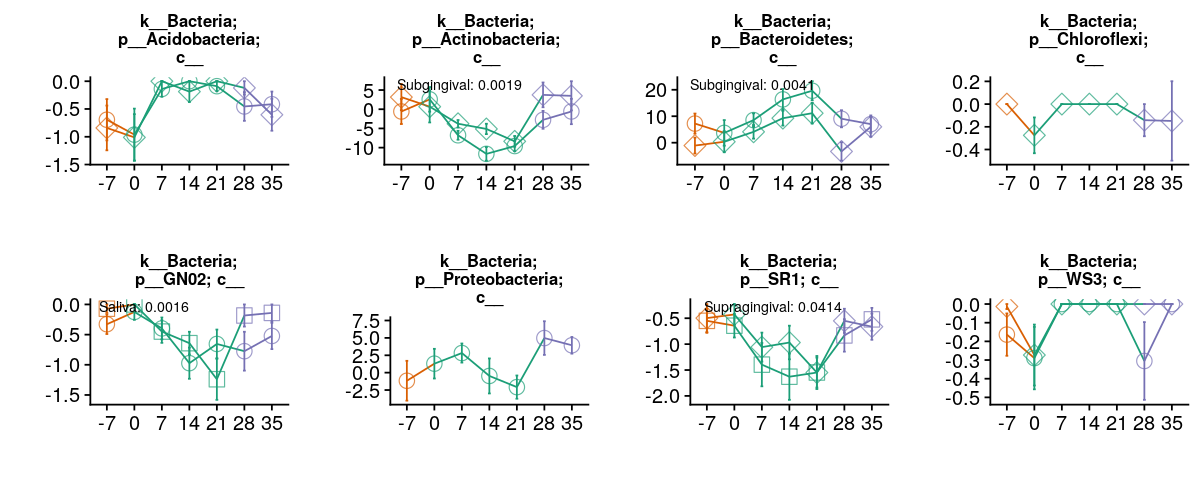

In [93]:
#Phylum-level plotting
options(repr.plot.width=10,repr.plot.height=4)
#pdf("Phylum_Abundance_Sig.pdf", width=10, height=4)
#for (i in c(5,6,7,8)) {
#    plot_list[[i]] <- plot_list[[i]] + xlab("Time (days)")
#}
#for (i in c(1,5)) {
#    plot_list[[i]] <- plot_list[[i]] + ylab("clr(abundance)")
#}
grid.arrange(grobs=plot_list, ncol=4)
#dev.off()

In [18]:
?annotate

In [62]:
?grid.arrange

In [117]:
?summary.lmerModLmerTest

In [133]:
?grep

In [264]:
options(repr.plot.width=2,repr.plot.height=2)
plot_list <- list()
i<-1
for (tax_str in unique(asv_tab.clr.agg[,tax_level])) {
    type_subset <- c()
    p_vals <- list()
    for (sample_type in c("SubG", "SupG", "Sal", "T")) {
        data_subset <- asv_tab.clr.agg[asv_tab.clr.agg[,tax_level]==tax_str,]
        data_subset <- subset(data_subset,phase=='induction')
        data_subset <- subset(data_subset,type==sample_type)
        data_subset$time <- as.numeric(as.character(data_subset$time))
        options(warn=-1)
        p.val <- tryCatch({
            fit1 <- lmer(clr_rel_abund~time+(1|subject), data=data_subset)
            p.val <- anova(fit1, type=1)['time',"Pr(>F)"]
            #if (as.numeric(p.val) < 0.05) {print(summary(anova(fit1)))}
            p.val}, 
            error = function(e) {p.val <- 1}, 
            finally = function(e) p.val,
            silent=TRUE)
        options(warn=0)
        if ((!is.null(p.val)) && (as.numeric(p.val) <= 0.05)) {
            type_subset <- c(type_subset, sample_type)
            p_vals[sample_type] <- p.val
        }
    }
    if (length(type_subset) > 0) {
        plot_subset <- asv_tab.clr.agg[asv_tab.clr.agg[,tax_level]==tax_str,]
        plot_subset <- subset(plot_subset, type %in% type_subset)
        label <- ""
        for (sample_type in type_subset) {
            label<- paste(label, paste(sample_type, 
                                      round(as.numeric(p_vals[sample_type]),3),
                                      sep=": p = "),
                          sep="\n")
        }
#Title mangling for tax_level = full_taxonomy and genus
        title <- taxonomy[tax_str,"Taxon"]
        if (grepl("f__",title)) {
            title <- gsub("k__.*c__", "", title)
            title <- gsub("; o__", "; ", title)
            title <- gsub("; f__", "\n", title)
            title <- gsub("; g__", "; ", title)
            title <- gsub("; s__", " ", title)
        } else {
            title<-tax_str
            title <- gsub("k__","",title)
            title <- gsub("; p__","\n",title)
        }
#Title mangling for tax_level = phylum
#        title <- tax_str
#        title<-gsub("k__Bacteria; p__","",title)
#        title<-gsub("; c__","",title)
        p <- ggplot(plot_subset,
                 aes(x=time,y=clr_rel_abund,group=type,shape=type,col=phase)) +
                 scale_shape_manual(drop=FALSE, values=c(0,1,5,6)) +
                 stat_summary(fun.y=mean, geom="line", aes(group=interaction(1,type)))  + 
                 stat_summary(fun.y=mean, geom="point", size=4, alpha=0.7) +
                 stat_summary(fun.data = mean_se, geom = "errorbar", width=0.1) +
                 scale_colour_brewer(palette = "Dark2") +
                 ggtitle(title) + xlab("") + ylab("") +
                 theme(legend.position="none", 
                       axis.title.y=element_text(size=10),
                       axis.title.x=element_text(size=10),
                       plot.title=element_text(size=10))+
                 annotate("text",label=gsub("^\n","",label),x=-Inf,y=Inf,hjust=-0.1, vjust=1.2, size=3)
        plot_list[[i]] <- p
        i <- i + 1   
    }
}

In [267]:
options(repr.plot.width=10,repr.plot.height=70)
pdf("ASV_Abundance_Sig.pdf", height=70, width=10)
grid.arrange(grobs=plot_list, ncol=4)
dev.off()

png 
  2